In [46]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from utils import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf 

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [37]:
raw_df = pd.read_csv('appliances+energy+prediction\energydata_complete.csv')

In [38]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [39]:
#convert date to DateTime format
raw_df['date'] = pd.to_datetime(raw_df['date'], infer_datetime_format=True)

C:\Users\91895\AppData\Local\Temp\ipykernel_29860\725958827.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  raw_df['date'] = pd.to_datetime(raw_df['date'], infer_datetime_format=True)


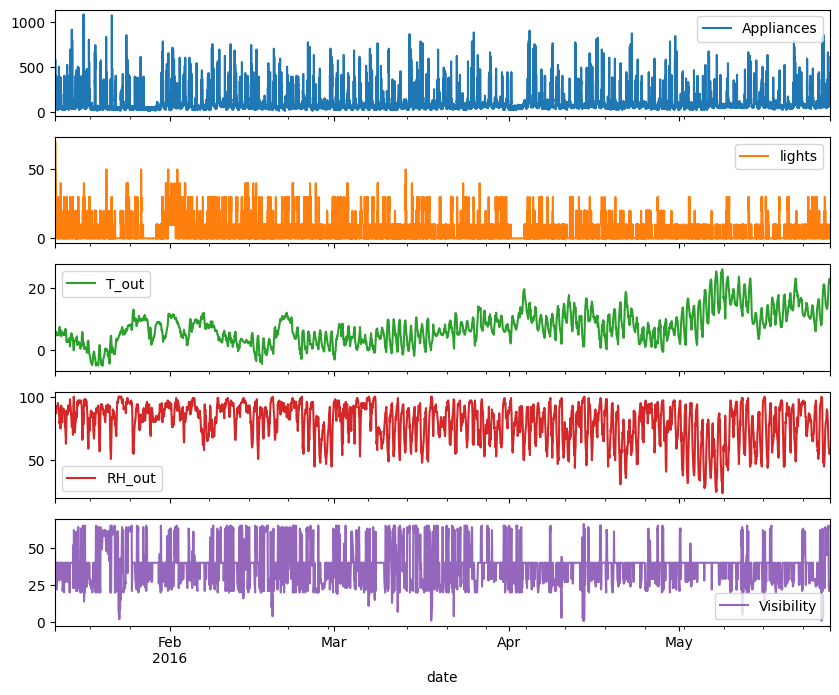

In [40]:
ax = raw_df.set_index('date')[['Appliances','lights','T_out','RH_out','Visibility']].plot(subplots=True)


In [41]:
df_input = raw_df[['Appliances','lights','T_out','RH_out','Visibility']]

In [42]:
df_input

,Appliances,lights,T_out,RH_out,Visibility
0,60,30,6.600000,92.000000,63.000000
1,60,30,6.483333,92.000000,59.166667
2,50,30,6.366667,92.000000,55.333333
3,50,40,6.250000,92.000000,51.500000
4,60,40,6.133333,92.000000,47.666667
...,...,...,...,...,...
19730,100,0,22.733333,55.666667,23.666667
19731,90,0,22.600000,56.000000,24.500000
19732,270,10,22.466667,56.333333,25.333333
19733,420,10,22.333333,56.666667,26.166667


In [43]:
df_input.describe()

,Appliances,lights,T_out,RH_out,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.411665,79.750418,38.330834
std,102.524891,7.935988,5.317409,14.901088,11.794719
min,10.000000,0.000000,-5.000000,24.000000,1.000000
25%,50.000000,0.000000,3.666667,70.333333,29.000000
50%,60.000000,0.000000,6.916667,83.666667,40.000000
75%,100.000000,0.000000,10.408333,91.666667,40.000000
max,1080.000000,70.000000,26.100000,100.000000,66.000000
